<a href="https://colab.research.google.com/github/kouseizack/NLP/blob/master/Ulmfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/ulmfit

/content/drive/My Drive/ulmfit


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk #NLTK(Natural Language Toolkit)
from nltk.corpus import stopwords #NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
from nltk.tokenize import word_tokenize# To tokenize words
import re
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import fastai
from fastai.text import * 
from functools import partial
import io
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from fastai.text import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels

In [ ]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
new_pd = df[['airline_sentiment' , 'airline_sentiment_confidence' , 'negativereason' , 'negativereason_confidence' , 'airline' , 'text']]
new_pd.head()
print (new_pd.iloc[0:])

      airline_sentiment  ...                                               text
0               neutral  ...                @VirginAmerica What @dhepburn said.
1              positive  ...  @VirginAmerica plus you've added commercials t...
2               neutral  ...  @VirginAmerica I didn't today... Must mean I n...
3              negative  ...  @VirginAmerica it's really aggressive to blast...
4              negative  ...  @VirginAmerica and it's a really big bad thing...
...                 ...  ...                                                ...
14635          positive  ...  @AmericanAir thank you we got on a different f...
14636          negative  ...  @AmericanAir leaving over 20 minutes Late Flig...
14637           neutral  ...  @AmericanAir Please bring American Airlines to...
14638          negative  ...  @AmericanAir you have my money, you change my ...
14639           neutral  ...  @AmericanAir we have 8 ppl so we need 2 know h...

[14640 rows x 6 columns]


14640 [3099, 2363, 9178]


Text(0, 0.5, 'Occurences')

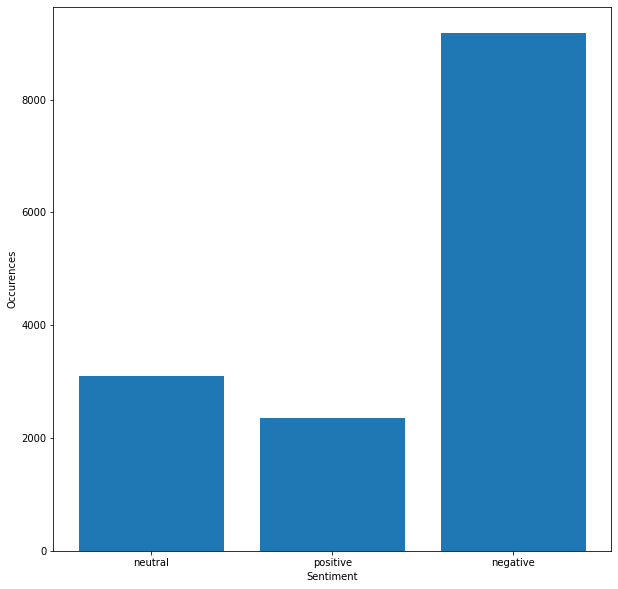

In [ ]:
de = new_pd
n_neu = 0
n_pos = 0
n_neg = 0
pos_sentiment = []
neg_sentiment = []
neu_sentiment = []
for i in range(len(de)):
  if(de.loc[i , "airline_sentiment"] == "neutral"):
    pos_sentiment.append(de.loc[i , "airline_sentiment_confidence"])
    n_neu += 1
  elif(de.loc[i , "airline_sentiment"] == "positive"):
    neg_sentiment.append(de.loc[i , "airline_sentiment_confidence"])
    n_pos += 1
  elif(de.loc[i ,"airline_sentiment"] == "negative"):
    neu_sentiment.append(de.loc[i , "airline_sentiment_confidence"])
    n_neg += 1
x = [n_neu , n_pos , n_neg]
print (len(de) , x)
y = ["neutral" , "positive" , "negative"]
plt.figure(figsize = (10, 10))
plt.bar(np.arange(len(x)),x)
plt.xticks(np.arange(len(x)), y)
plt.xlabel('Sentiment')
plt.ylabel('Occurences')

positive->  var:  0.03443417306392334 mean:  0.8233033559212648
positive->  var:  0.03219866076940862 mean:  0.872038933559035
positive->  var:  0.019071880881577095 mean:  0.9333653192416647


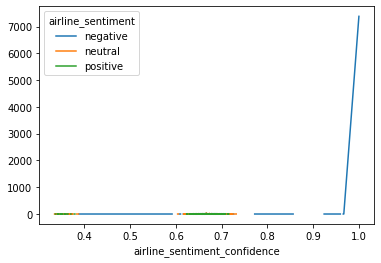

In [ ]:
de.groupby(['airline_sentiment_confidence', 'airline_sentiment']).size().unstack().plot(kind='line', stacked=False)
neu = np.array(neu_sentiment)
nu = neu.mean()
nu_var = neu.var()

neg = np.array(neg_sentiment)
ng = neg.mean()
ng_var = neg.var()

pos = np.array(pos_sentiment)
po = pos.mean()
ps_var = pos.var()

print ("positive-> ", "var: " , ps_var , "mean: " , po)
print ("positive-> ", "var: " , ng_var , "mean: " , ng)
print ("positive-> ", "var: " , nu_var , "mean: " , nu)


In [ ]:
de['text'] = de['text'].str.replace("[^a-zA-Z]", " ")
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tokenized_doc = de['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

de['text'] = detokenized_doc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
de.head(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
0,neutral,1.0000,NaN,NaN,Virgin America,VirginAmerica What dhepburn said
1,positive,0.3486,NaN,0.0000,Virgin America,VirginAmerica plus added commercials experienc...
2,neutral,0.6837,NaN,NaN,Virgin America,VirginAmerica I today Must mean I need take an...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,VirginAmerica really aggressive blast obnoxiou...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,VirginAmerica really big bad thing


In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(de, stratify = de['airline_sentiment'], test_size = 0.4, random_state = 12)

In [ ]:
df_trn.head(5)
df_trn = df_trn[['airline_sentiment' , 'text']]
df_val = df_val[['airline_sentiment' , 'text']]
df_trn.head(10)
print (len(df_trn))
df_tst = df_trn.sample(frac=0.2 , replace = True)
print (len(df_trn) , len(df_tst))


8784
8784 1757


In [ ]:
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val , path = "")
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, vocab=data_lm.train_ds.vocab, valid_df = df_val , text_cols = 'text', label_cols = 'airline_sentiment',bs=32)
data_lm.show_batch()

idx,text
0,much baggage check xxmaj international flights xxbos americanair point xxmaj say counter i clearly see site xxup aa agent loss words xxbos united xxmaj boeing xxmaj star xxmaj alliance short finals xxmaj heathrowairport l amazing xxunk morning xxmaj avgeek http co xxunk xxbos united xxmaj trying change flight booked hours ago online system charging fee per passenger could please help xxbos virginamerica i need receipt flight change xxmaj can send
1,xxbos united almost major accident ua xxmaj how passing information us waiting plane xxbos americanair ok xxmaj late xxmaj flight xxmaj and matter flight xxmaj cancelled xxmaj flighted morning i xxup yyz since xxup am xxbos southwestair awesome thank xxbos usairways thanks however i feel like system failed solution xxbos united still waiting find rep working hard upset wait tomorrow pm get xxunk xxbos southwestair bunch liars xxmaj cancelled xxmaj
2,xxunk xxmaj need confirmed xxup bna xxmaj been bumped day need home xxbos southwestair xxmaj adding xxup rr number xxmaj marriott stay hard xxmaj won take xxup rr number checkin xxmaj marriott phone xxup cs helpful xxbos usairways xxmaj new marketing song https co f lfulcbq let us know think http co xxunk xxbos jetblue xxmaj thanks credit hr delay i tell customer service means lot xxup you xxmaj thankful
3,united access dial makes faster xxbos jetblue tried us xxunk xxmaj do think i flying terminal xxmaj risk fine xxunk police official xxbos southwestair thank confirmation xxmaj maybe people flight xxunk xxunk xxbos americanair bet make screw right xxmaj things i need bag job grounded today xxunk xxbos southwestair may want direct people xxunk xxunk xxbos united xxmaj please help i xxmaj ethiopia adopting two year old child xxmaj have
4,flight going sit tarmac xxup forever xxbos usairways would give us option get plane instead sit hour half knew gate xxbos united xxmaj never get flight time hour delay earlier another hour delay connecting flight xxmaj makes straight delays xxbos usairways flight xxup fra xxup xxunk odd xxunk xxunk xxunk xxmaj frankfurt xxmaj is everything ok xxbos usairways flight delayed hours deadhead crew xxmaj lets make paying customers wait great


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


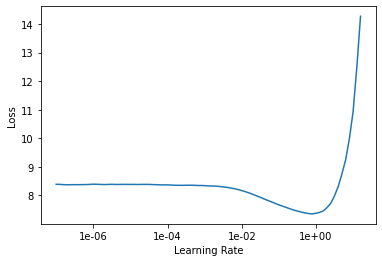

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained = True, drop_mult=0.4)
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot()

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM , pretrained = True, 
                               drop_mult=0.5)
learn.fit_one_cycle(cyc_len=1, max_lr=1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.591013,5.462779,0.139356,00:11


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(cyc_len=20, max_lr=1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.138934,4.827569,0.203501,00:13
1,4.958466,4.680926,0.214908,00:13
2,4.762516,4.601954,0.220113,00:13
3,4.579434,4.626278,0.214239,00:13
4,4.355671,4.958786,0.181262,00:13
5,4.154058,4.733445,0.201128,00:13
6,3.816457,4.843653,0.204441,00:13
7,3.527061,4.964786,0.193398,00:13
8,3.206537,5.140672,0.198038,00:13
9,2.844232,5.339032,0.195853,00:13


In [ ]:
learn.save_encoder('ft_enc')

In [ ]:
classifier = text_classifier_learner(data_clas, AWD_LSTM , drop_mult=0.5)
classifier.load_encoder('ft_enc')
classifier.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


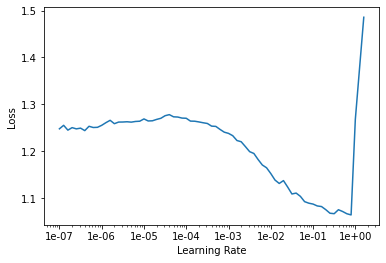

In [ ]:
classifier.lr_find(start_lr=1e-8, end_lr=1e2)
classifier.recorder.plot()

In [ ]:
classifier.fit_one_cycle(cyc_len=1, max_lr=1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.599546,0.592678,0.762124,00:13


In [ ]:
classifier.freeze_to(-2)
classifier.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.592808,0.574808,0.769809,00:15


In [ ]:
classifier.freeze_to(-3)
classifier.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.595259,0.566011,0.777322,00:21


In [ ]:
classifier.unfreeze()
classifier.fit_one_cycle(20, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.445163,0.558594,0.783128,00:27
1,0.419868,0.557822,0.781079,00:27
2,0.398060,0.587341,0.783128,00:28
3,0.382052,0.636788,0.774761,00:26
4,0.306678,0.711227,0.780055,00:27
5,0.253099,0.775550,0.771687,00:27
6,0.234733,0.693054,0.776127,00:27
7,0.195796,0.746911,0.771516,00:28
8,0.168032,0.786574,0.778347,00:27
9,0.112020,0.906304,0.775444,00:27


In [ ]:
data_lm.show_batch()

idx,text
0,half hour amp crew hrs limit amp deplane xxmaj unacceptable xxbos united i sending posting complete details circumstances surrounding matter xxmaj united airlines ashamed xxbos jetblue landed thank anyway xxmaj btw flight staff flight wonderful despite full day heavy load xxbos usairways always go xxmaj what happened xxmaj airbus xxmaj boeing customer service xxbos jetblue new xxup ceo seeks right balance please passengers xxmaj wall xxmaj daily xxmaj journal http
1,xxmaj loosing lot business using xxmaj xxunk i ca nt believe ca nt apply card live xxmaj iowa xxbos americanair went check flight hr advance husband i seated separately hr flight happen xxbos americanair number even let wait next customer rep xxmaj very frustrating xxmaj can talk humans xxbos usairways i day xxmaj can find bag anywhere bc saying never scanned amp technically never left xxup lax xxbos xxmaj southwestair
2,turn trip i buy return ticket child xxbos southwestair rules xxbos united xxmaj slightly better xxmaj crew spent long time searching better altitude xxmaj would helped let pax xxunk drops xxbos americanair xxmaj call xxmaj chairman call xxmaj emerald xxmaj after today call former customer xxbos usairways hell overbook plane knew people actually seat assignments xxunk uncaring piss poorplanning xxbos americanair xxmaj still waiting bags flight yesterday xxmaj first xxmaj
3,xxmaj we made xxmaj seattle xxbos usairways getting extremely frustrated w phone online service merging frequent flyer miles xxbos americanair xxmaj that ok xxmaj you may keep lose bag info longer trust xxmaj bad way handle xxbos united officially xxunk deltaassist better flight experience pleasant cabin crew timeliness xxup ua switching xxbos united xxmaj hey many time changes xxup ua xxmaj we going tonight xxup mia xxup ewr xxbos usairways
4,na rock xxbos united i something missing checked baggage xxbos jetblue i wanted say flight attendant xxunk best tonight flight bwi xxmaj bos xxmaj great guy made flight fantastic xxbos americanair xxmaj can please give travel agent support phone number i ca nt find website xxmaj thanks xxbos americanair thank xxbos united xxup ewr xxup lax xxup ua seat armrest broken xxunk takeoff flight full xxup fa filed report chat


In [ ]:
preds, targets = classifier.get_preds()
predictions = np.argmax(preds, axis=1)
pd.crosstab(predictions, targets)
predicted = [None for i in range(len(df_val))]
df_val['predicted'] = predicted
df_val.head(2)

,airline_sentiment,text,predicted
13484,negative,AmericanAir I filled whole form receiving poor...,None
11120,negative,USAirways Some kids anxious Husband I sit curr...,None


In [ ]:
df_val['predicted'] = df_val['text'].apply(lambda row: str(classifier.predict(row)[0]))
df_val.tail()

,airline_sentiment,text,predicted
13959,negative,AmericanAir bags Baggage claim C C flt I see p...,negative
5070,negative,SouthwestAir want explain I hold hrs tonight t...,negative
9031,neutral,USAirways calls amp wasted hrs hold change com...,negative
8646,positive,JetBlue guys continue impress Your crew MCO ga...,negative
6889,negative,jetblue directed mobile website Where direct l...,negative


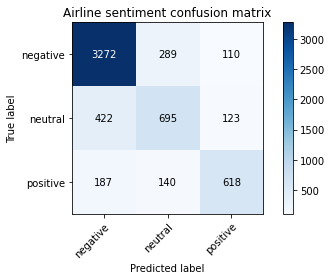

In [ ]:
cm = confusion_matrix(df_val['airline_sentiment'], df_val['predicted'])
classes=['negative', 'neutral', 'positive'] 
title='Airline sentiment confusion matrix'
# Only use the labels that appear in the data
#classes = classes[unique_labels(y_true, y_pred)]
cmap=plt.cm.Blues
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()